In [1]:
import pandas as pd
import requests
import io

# URLs for the wine quality datasets
red_wine_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'
white_wine_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv'

# Download the datasets
red_wine_content = requests.get(red_wine_url).content
white_wine_content = requests.get(white_wine_url).content

# Read the datasets into pandas DataFrames
red_wine_df = pd.read_csv(io.StringIO(red_wine_content.decode('utf-8')), sep=';')
white_wine_df = pd.read_csv(io.StringIO(white_wine_content.decode('utf-8')), sep=';')

# Add a 'wine_type' column
red_wine_df['wine_type'] = 'red'
white_wine_df['wine_type'] = 'white'

# Concatenate the two DataFrames
wine_df = pd.concat([red_wine_df, white_wine_df], ignore_index=True)

# Save the combined dataset to a CSV file
wine_df.to_csv('winequality.csv', index=False)

print('Dataset created successfully!')
print(wine_df.info())

Dataset created successfully!
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  wine_type             6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB
None


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [2]:
# Load the dataset
wine_df = pd.read_csv('winequality.csv')

# Display first few rows
print('First 5 rows:')
print(wine_df.head())

First 5 rows:
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality wine_type  
0      9.4        5       red  
1      9

In [3]:
# Check for missing values
print('Missing values:')
print(wine_df.isnull().sum())


Missing values:
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
wine_type               0
dtype: int64


In [4]:
# Summary statistics
print('Summary statistics:')
print(wine_df.describe())

Summary statistics:
       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    6497.000000       6497.000000  6497.000000     6497.000000   
mean        7.215307          0.339666     0.318633        5.443235   
std         1.296434          0.164636     0.145318        4.757804   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.400000          0.230000     0.250000        1.800000   
50%         7.000000          0.290000     0.310000        3.000000   
75%         7.700000          0.400000     0.390000        8.100000   
max        15.900000          1.580000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  6497.000000          6497.000000           6497.000000  6497.000000   
mean      0.056034            30.525319            115.744574     0.994697   
std       0.035034            17.749400             56.521855     0.002999   
min       0.009000          

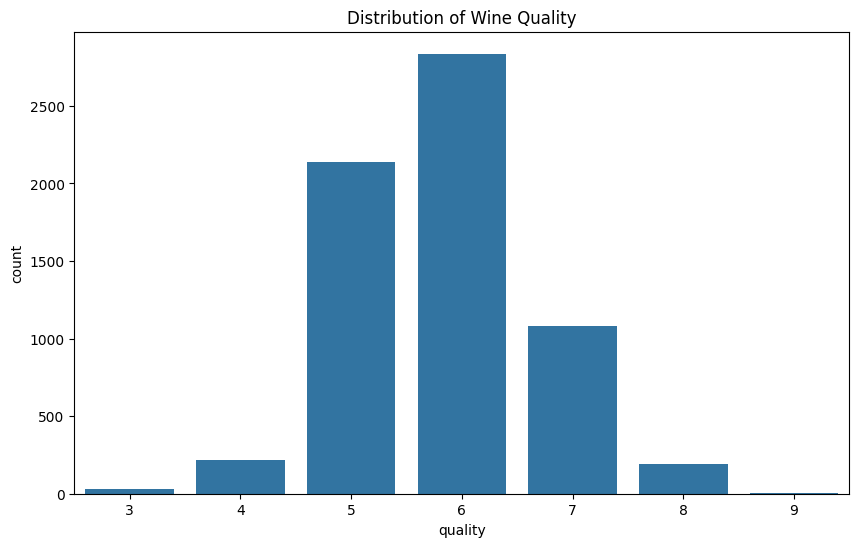

In [8]:
# Visualize quality distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='quality', data=wine_df)
plt.title('Distribution of Wine Quality')
plt.show()

In [5]:
# Preprocessing
# Convert wine_type to numeric
le = LabelEncoder()
wine_df['wine_type'] = le.fit_transform(wine_df['wine_type'])

In [6]:
# Define target variable (y) by categorizing quality
# 3 categories: low (3-5), medium (6), high (7-9)
bins = [2, 5, 6, 9]
labels = ['low', 'medium', 'high']
wine_df['quality_category'] = pd.cut(wine_df['quality'], bins=bins, labels=labels, include_lowest=True)

In [7]:
# Drop the original quality column
wine_df = wine_df.drop('quality', axis=1)

# Define features (X) and target (y)
X = wine_df.drop('quality_category', axis=1)
y = wine_df['quality_category']

In [8]:

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f'X_train shape: {X_train_scaled.shape}')
print(f'X_test shape: {X_test_scaled.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')

X_train shape: (5197, 12)
X_test shape: (1300, 12)
y_train shape: (5197,)
y_test shape: (1300,)


In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
# Create and train Logistic Regression model
# Using 'lbfgs' solver with increased max_iter for convergence
log_reg = LogisticRegression(
    multi_class='multinomial',  # For multi-class classification (low, medium, high)
    solver='lbfgs',
    max_iter=1000,
    random_state=42
)
# Fit the model on training data
log_reg.fit(X_train_scaled, y_train)

C:\Users\anish\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(max_iter=1000, multi_class='multinomial', random_state=42)

In [11]:

# Make predictions on test data
y_pred = log_reg.predict(X_test_scaled)

In [14]:
# Evaluate the model
print("="*50)
print("LOGISTIC REGRESSION CLASSIFICATION RESULTS")
print("="*50)
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {accuracy:.4f} ({accuracy*100:.2f}%)")
# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
# Confusion Matrix
print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
print(cm)

LOGISTIC REGRESSION CLASSIFICATION RESULTS

Accuracy: 0.5823 (58.23%)

Classification Report:
              precision    recall  f1-score   support

        high       0.55      0.33      0.41       256
         low       0.67      0.63      0.65       477
      medium       0.53      0.65      0.59       567

    accuracy                           0.58      1300
   macro avg       0.59      0.54      0.55      1300
weighted avg       0.59      0.58      0.58      1300


Confusion Matrix:
[[ 85  13 158]
 [  6 301 170]
 [ 63 133 371]]


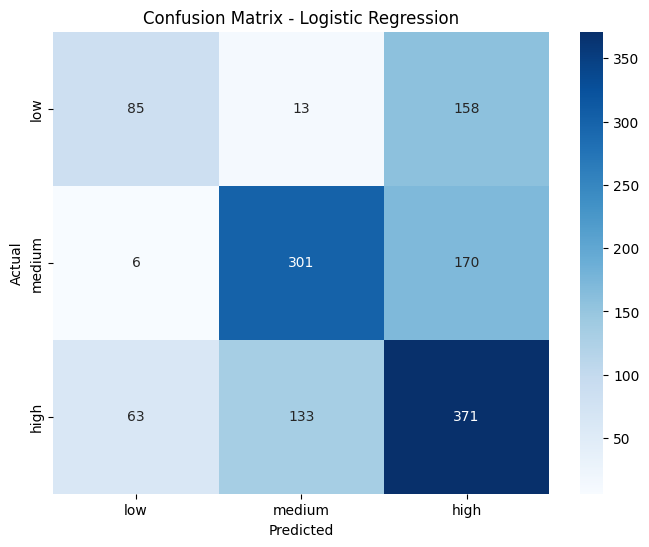

In [15]:
# Visualize Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['low', 'medium', 'high'],
            yticklabels=['low', 'medium', 'high'])
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [16]:
# Get prediction probabilities
y_pred_proba = log_reg.predict_proba(X_test_scaled)
print("\nSample prediction probabilities (first 5):")
print(y_pred_proba[:5])
# Feature importance (coefficients)
print("\nFeature Coefficients (Importance):")
feature_names = X.columns.tolist()
for i, class_name in enumerate(['low', 'medium', 'high']):
    print(f"\n{class_name.upper()} class:")
    for feature, coef in sorted(zip(feature_names, log_reg.coef_[i]), 
                                 key=lambda x: abs(x[1]), reverse=True):
        print(f"  {feature}: {coef:.4f}")


Sample prediction probabilities (first 5):
[[0.36203378 0.10243453 0.53553169]
 [0.36924407 0.12143141 0.50932452]
 [0.50863995 0.05690896 0.4344511 ]
 [0.07393631 0.44886487 0.47719882]
 [0.1078844  0.38184808 0.51026752]]

Feature Coefficients (Importance):

LOW class:
  density: -0.9086
  residual sugar: 0.7570
  alcohol: 0.4704
  volatile acidity: -0.4625
  fixed acidity: 0.4222
  sulphates: 0.2908
  pH: 0.2855
  wine_type: -0.2453
  total sulfur dioxide: -0.1619
  free sulfur dioxide: 0.1553
  chlorides: -0.1193
  citric acid: -0.0314

MEDIUM class:
  alcohol: -0.6749
  volatile acidity: 0.5888
  residual sugar: -0.5660
  density: 0.5309
  sulphates: -0.2634
  wine_type: 0.2558
  total sulfur dioxide: 0.2119
  fixed acidity: -0.1949
  free sulfur dioxide: -0.1818
  pH: -0.1552
  chlorides: 0.0825
  citric acid: 0.0431

HIGH class:
  density: 0.3776
  fixed acidity: -0.2273
  alcohol: 0.2045
  residual sugar: -0.1910
  pH: -0.1304
  volatile acidity: -0.1263
  total sulfur dioxide

In [17]:
# Import Decision Tree Classifier and evaluation metrics
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
# Create and train Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(
    criterion='gini',      # Split criterion: 'gini' or 'entropy'
    max_depth=10,          # Maximum depth of the tree (prevents overfitting)
    min_samples_split=10,  # Minimum samples required to split a node
    min_samples_leaf=5,    # Minimum samples required at a leaf node
    random_state=42
)
# Fit the model on training data (using scaled or unscaled - Decision Trees don't require scaling)
dt_classifier.fit(X_train_scaled, y_train)
# Make predictions on test data
y_pred_dt = dt_classifier.predict(X_test_scaled)


DECISION TREE CLASSIFICATION RESULTS

Accuracy: 0.5915 (59.15%)

Classification Report:
              precision    recall  f1-score   support

        high       0.54      0.55      0.55       256
         low       0.65      0.61      0.63       477
      medium       0.57      0.60      0.58       567

    accuracy                           0.59      1300
   macro avg       0.59      0.58      0.59      1300
weighted avg       0.59      0.59      0.59      1300


Confusion Matrix:
[[141  23  92]
 [ 25 289 163]
 [ 95 133 339]]


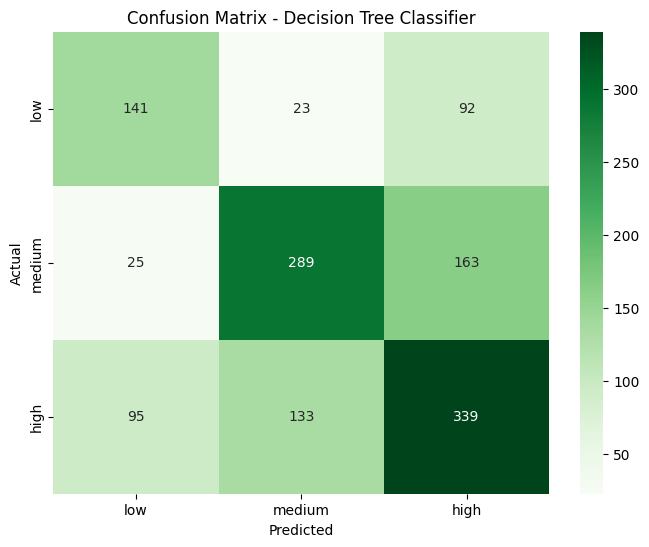

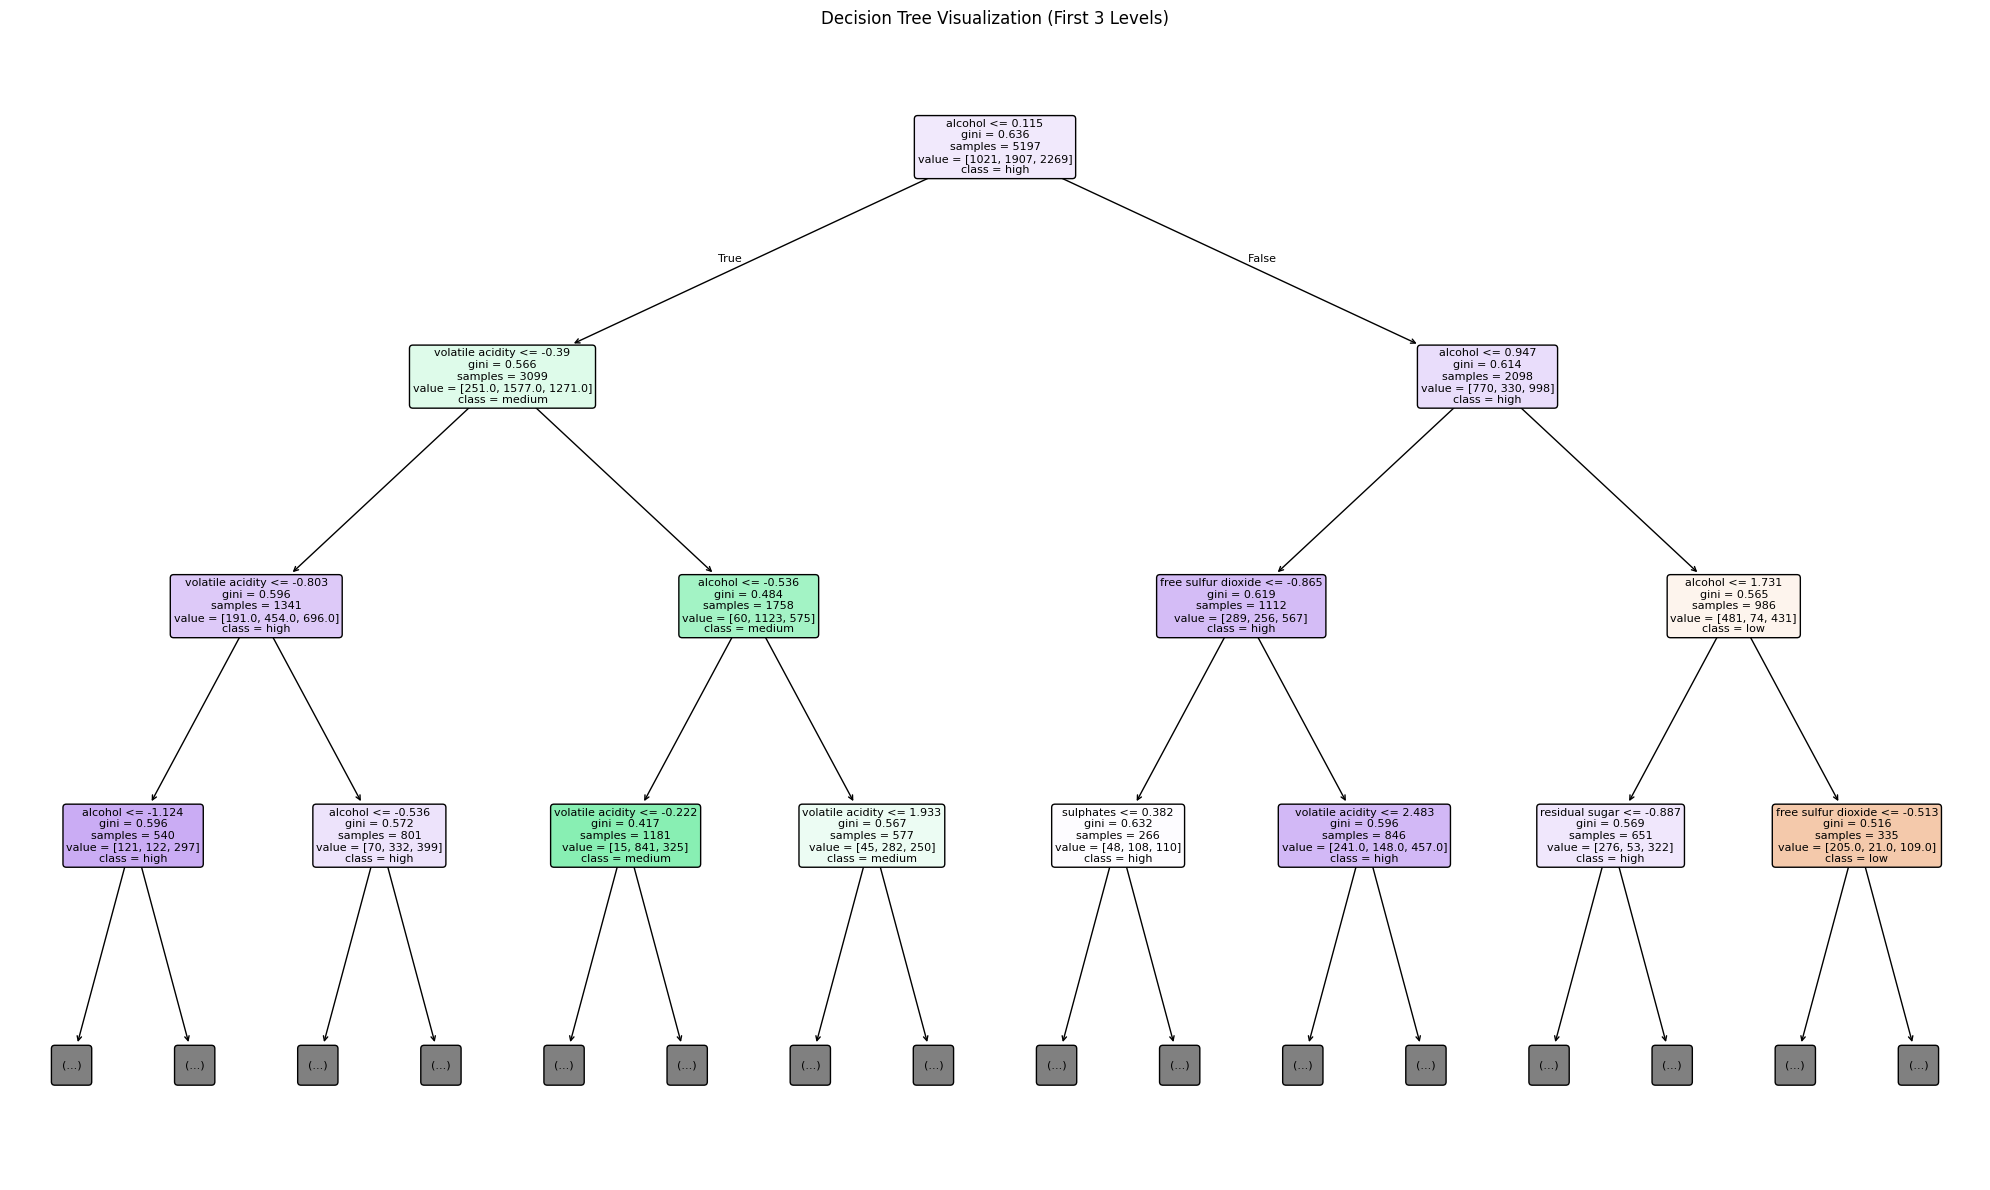


Feature Importance:
                 Feature  Importance
10               alcohol    0.267662
1       volatile acidity    0.147674
3         residual sugar    0.080438
9              sulphates    0.072909
5    free sulfur dioxide    0.069869
6   total sulfur dioxide    0.068765
4              chlorides    0.063328
8                     pH    0.062201
2            citric acid    0.060644
7                density    0.057520
0          fixed acidity    0.047856
11             wine_type    0.001133


C:\Users\anish\AppData\Local\Temp\ipykernel_9208\516188423.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance, palette='viridis')


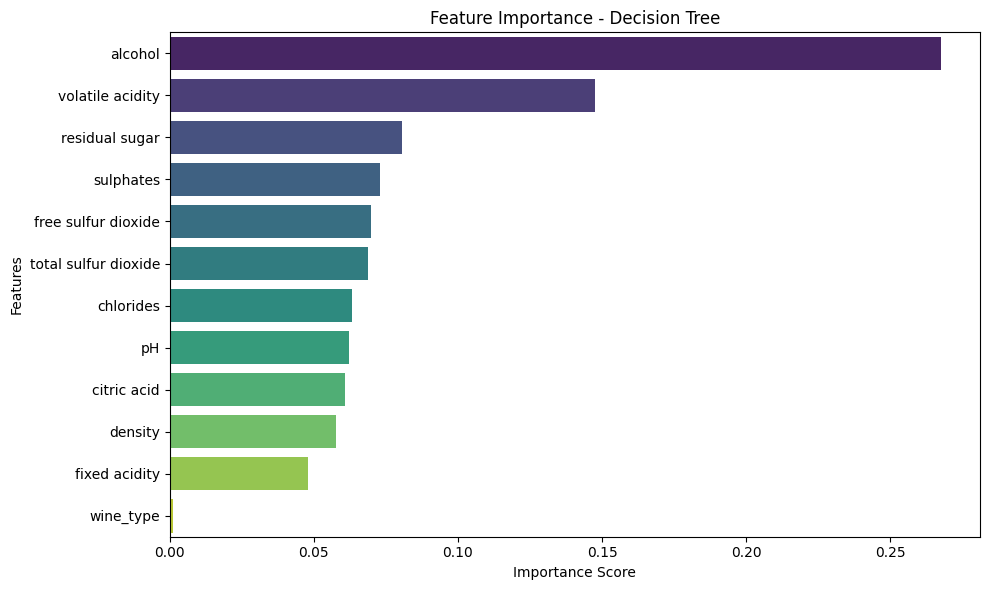


Tree Parameters:
Number of features: 12
Number of classes: 3
Tree depth: 10
Number of leaves: 342


In [18]:
# Evaluate the model
print("="*50)
print("DECISION TREE CLASSIFICATION RESULTS")
print("="*50)
# Accuracy
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"\nAccuracy: {accuracy_dt:.4f} ({accuracy_dt*100:.2f}%)")
# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_dt))
# Confusion Matrix
print("\nConfusion Matrix:")
cm_dt = confusion_matrix(y_test, y_pred_dt)
print(cm_dt)
# Visualize Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Greens', 
            xticklabels=['low', 'medium', 'high'],
            yticklabels=['low', 'medium', 'high'])
plt.title('Confusion Matrix - Decision Tree Classifier')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
# Visualize the Decision Tree
plt.figure(figsize=(20, 12))
plot_tree(dt_classifier, 
          feature_names=X.columns.tolist(),
          class_names=['low', 'medium', 'high'],
          filled=True,
          rounded=True,
          fontsize=8,
          max_depth=3)  # Show only first 3 levels for readability
plt.title('Decision Tree Visualization (First 3 Levels)')
plt.tight_layout()
plt.show()
# Feature Importance
print("\nFeature Importance:")
feature_importance = pd.DataFrame({
    'Feature': X.columns.tolist(),
    'Importance': dt_classifier.feature_importances_
}).sort_values('Importance', ascending=False)
print(feature_importance)
# Visualize Feature Importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance, palette='viridis')
plt.title('Feature Importance - Decision Tree')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.tight_layout()
plt.show()
# Tree parameters
print("\nTree Parameters:")
print(f"Number of features: {dt_classifier.n_features_in_}")
print(f"Number of classes: {dt_classifier.n_classes_}")
print(f"Tree depth: {dt_classifier.get_depth()}")
print(f"Number of leaves: {dt_classifier.get_n_leaves()}")

K-NEAREST NEIGHBOR CLASSIFICATION RESULTS

Accuracy: 0.5823 (58.23%)

Classification Report:
              precision    recall  f1-score   support

        high       0.48      0.53      0.51       256
         low       0.67      0.65      0.66       477
      medium       0.56      0.55      0.55       567

    accuracy                           0.58      1300
   macro avg       0.57      0.58      0.57      1300
weighted avg       0.59      0.58      0.58      1300


Confusion Matrix:
[[136   9 111]
 [ 31 308 138]
 [114 140 313]]


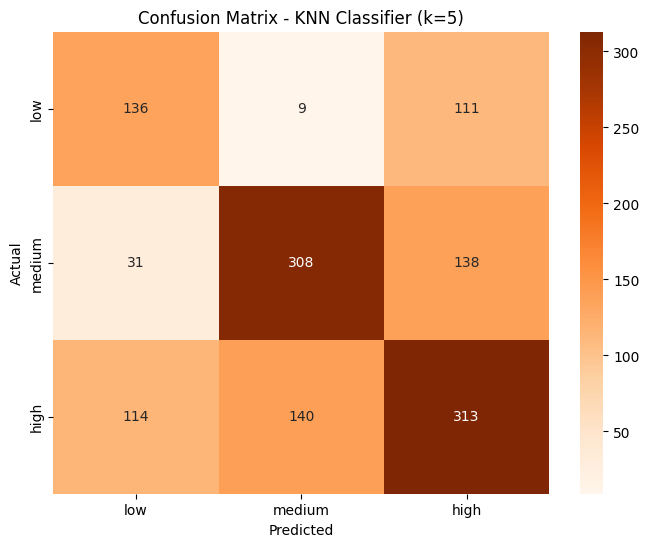


Sample prediction probabilities (first 5):
[[0.2 0.  0.8]
 [0.  0.2 0.8]
 [0.2 0.2 0.6]
 [0.  0.6 0.4]
 [0.  1.  0. ]]

FINDING OPTIMAL K VALUE


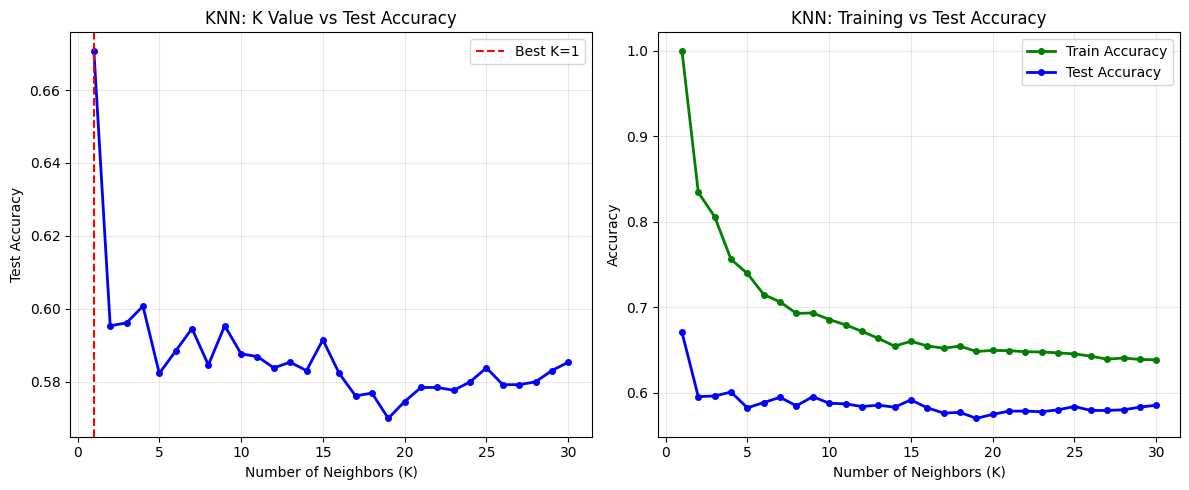


Optimal K value: 1
Best Test Accuracy: 0.6708 (67.08%)

FINAL MODEL WITH OPTIMAL K=1

Classification Report (Optimal K):
              precision    recall  f1-score   support

        high       0.63      0.62      0.63       256
         low       0.73      0.69      0.71       477
      medium       0.64      0.68      0.66       567

    accuracy                           0.67      1300
   macro avg       0.67      0.66      0.67      1300
weighted avg       0.67      0.67      0.67      1300



In [19]:
# Import KNN Classifier and evaluation metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Create and train KNN Classifier
knn_classifier = KNeighborsClassifier(
    n_neighbors=5,          # Number of neighbors (k)
    weights='uniform',      # 'uniform' or 'distance' (distance-weighted voting)
    metric='minkowski',     # Distance metric
    p=2                     # p=2 for Euclidean distance, p=1 for Manhattan
)

# Fit the model on training data (KNN requires scaled data)
knn_classifier.fit(X_train_scaled, y_train)

# Make predictions on test data
y_pred_knn = knn_classifier.predict(X_test_scaled)

# Evaluate the model
print("="*50)
print("K-NEAREST NEIGHBOR CLASSIFICATION RESULTS")
print("="*50)

# Accuracy
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f"\nAccuracy: {accuracy_knn:.4f} ({accuracy_knn*100:.2f}%)")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_knn))

# Confusion Matrix
print("\nConfusion Matrix:")
cm_knn = confusion_matrix(y_test, y_pred_knn)
print(cm_knn)

# Visualize Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Oranges', 
            xticklabels=['low', 'medium', 'high'],
            yticklabels=['low', 'medium', 'high'])
plt.title('Confusion Matrix - KNN Classifier (k=5)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Get prediction probabilities
y_pred_proba_knn = knn_classifier.predict_proba(X_test_scaled)
print("\nSample prediction probabilities (first 5):")
print(y_pred_proba_knn[:5])

# Find optimal K using elbow method
print("\n" + "="*50)
print("FINDING OPTIMAL K VALUE")
print("="*50)

k_range = range(1, 31)
train_scores = []
test_scores = []

for k in k_range:
    knn_temp = KNeighborsClassifier(n_neighbors=k)
    knn_temp.fit(X_train_scaled, y_train)
    train_scores.append(knn_temp.score(X_train_scaled, y_train))
    test_scores.append(knn_temp.score(X_test_scaled, y_test))

# Plot K vs Accuracy
plt.figure(figsize=(12, 5))

# Subplot 1: Test accuracy
plt.subplot(1, 2, 1)
plt.plot(k_range, test_scores, 'b-o', linewidth=2, markersize=4)
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Test Accuracy')
plt.title('KNN: K Value vs Test Accuracy')
plt.grid(True, alpha=0.3)

# Find best K
best_k = k_range[np.argmax(test_scores)]
best_accuracy = max(test_scores)
plt.axvline(x=best_k, color='r', linestyle='--', label=f'Best K={best_k}')
plt.legend()

# Subplot 2: Train vs Test accuracy
plt.subplot(1, 2, 2)
plt.plot(k_range, train_scores, 'g-o', label='Train Accuracy', linewidth=2, markersize=4)
plt.plot(k_range, test_scores, 'b-o', label='Test Accuracy', linewidth=2, markersize=4)
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Accuracy')
plt.title('KNN: Training vs Test Accuracy')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\nOptimal K value: {best_k}")
print(f"Best Test Accuracy: {best_accuracy:.4f} ({best_accuracy*100:.2f}%)")

# Train final model with optimal K
print("\n" + "="*50)
print(f"FINAL MODEL WITH OPTIMAL K={best_k}")
print("="*50)

knn_optimal = KNeighborsClassifier(n_neighbors=best_k)
knn_optimal.fit(X_train_scaled, y_train)
y_pred_optimal = knn_optimal.predict(X_test_scaled)

print("\nClassification Report (Optimal K):")
print(classification_report(y_test, y_pred_optimal))

GAUSSIAN NAIVE BAYES CLASSIFICATION RESULTS

Note: Gaussian NB assumes features follow a normal distribution
Best suited for continuous/real-valued features like this dataset

Accuracy: 0.4815 (48.15%)

Classification Report:
              precision    recall  f1-score   support

        high       0.40      0.62      0.48       256
         low       0.59      0.49      0.54       477
      medium       0.47      0.41      0.44       567

    accuracy                           0.48      1300
   macro avg       0.48      0.51      0.49      1300
weighted avg       0.50      0.48      0.48      1300

Confusion Matrix:
[[160  19  77]
 [ 55 235 187]
 [189 147 231]]


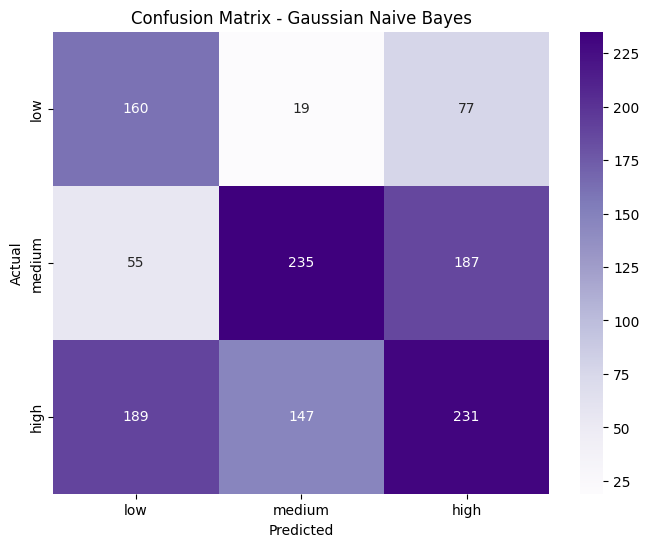


Sample prediction probabilities (first 5):
[[0.67909309 0.01431639 0.30659052]
 [0.81353363 0.00419239 0.18227398]
 [0.7456401  0.00549523 0.24886467]
 [0.07601578 0.32834871 0.59563551]
 [0.01029389 0.44819417 0.54151194]]

Model Parameters:
Class Priors: [0.1964595  0.36694247 0.43659804]
Classes: ['high' 'low' 'medium']

MULTINOMIAL NAIVE BAYES CLASSIFICATION RESULTS

Note: Multinomial NB requires non-negative features
Typically used for text classification (word counts)
We'll use MinMaxScaler to make features non-negative

Accuracy: 0.4646 (46.46%)

Classification Report:
              precision    recall  f1-score   support

        high       0.00      0.00      0.00       256
         low       0.72      0.13      0.21       477
      medium       0.45      0.96      0.61       567

    accuracy                           0.46      1300
   macro avg       0.39      0.36      0.27      1300
weighted avg       0.46      0.46      0.34      1300

Confusion Matrix:
[[  0   0 256]
 [

C:\Users\anish\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\anish\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\anish\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classificati

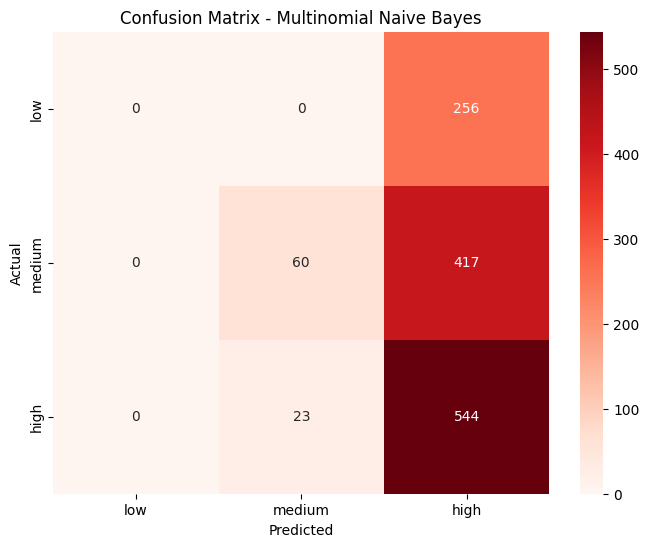


COMPARISON: GAUSSIAN NB vs MULTINOMIAL NB

          Model  Accuracy                Best For
   Gaussian NB  0.481538     Continuous features
Multinomial NB  0.464615 Discrete/Count features


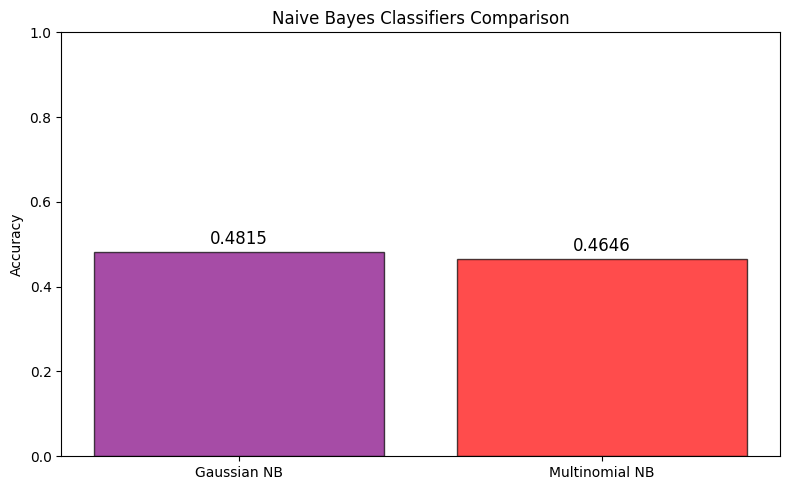


RECOMMENDATION

✓ Gaussian Naive Bayes performs better (0.4815 vs 0.4646)
  This is expected since the wine dataset has continuous features.

General Guidelines:
• Gaussian NB: Use for continuous/real-valued features
• Multinomial NB: Use for discrete features, especially text (word counts)
• Bernoulli NB: Use for binary/boolean features


In [20]:
# Import Naive Bayes Classifiers and evaluation metrics
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# ============================================================
# GAUSSIAN NAIVE BAYES (Best for continuous features)
# ============================================================
print("="*60)
print("GAUSSIAN NAIVE BAYES CLASSIFICATION RESULTS")
print("="*60)
print("\nNote: Gaussian NB assumes features follow a normal distribution")
print("Best suited for continuous/real-valued features like this dataset\n")

# Create and train Gaussian Naive Bayes
gnb_classifier = GaussianNB()

# Fit the model on training data
gnb_classifier.fit(X_train_scaled, y_train)

# Make predictions on test data
y_pred_gnb = gnb_classifier.predict(X_test_scaled)

# Accuracy
accuracy_gnb = accuracy_score(y_test, y_pred_gnb)
print(f"Accuracy: {accuracy_gnb:.4f} ({accuracy_gnb*100:.2f}%)")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_gnb))

# Confusion Matrix
print("Confusion Matrix:")
cm_gnb = confusion_matrix(y_test, y_pred_gnb)
print(cm_gnb)

# Visualize Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_gnb, annot=True, fmt='d', cmap='Purples', 
            xticklabels=['low', 'medium', 'high'],
            yticklabels=['low', 'medium', 'high'])
plt.title('Confusion Matrix - Gaussian Naive Bayes')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Get prediction probabilities
y_pred_proba_gnb = gnb_classifier.predict_proba(X_test_scaled)
print("\nSample prediction probabilities (first 5):")
print(y_pred_proba_gnb[:5])

# Class priors and feature statistics
print("\nModel Parameters:")
print(f"Class Priors: {gnb_classifier.class_prior_}")
print(f"Classes: {gnb_classifier.classes_}")


# ============================================================
# MULTINOMIAL NAIVE BAYES (For non-negative discrete features)
# ============================================================
print("\n" + "="*60)
print("MULTINOMIAL NAIVE BAYES CLASSIFICATION RESULTS")
print("="*60)
print("\nNote: Multinomial NB requires non-negative features")
print("Typically used for text classification (word counts)")
print("We'll use MinMaxScaler to make features non-negative\n")

# Multinomial NB requires non-negative values
# Scale data to [0, 1] range using MinMaxScaler
minmax_scaler = MinMaxScaler()
X_train_minmax = minmax_scaler.fit_transform(X_train)
X_test_minmax = minmax_scaler.transform(X_test)

# Create and train Multinomial Naive Bayes
mnb_classifier = MultinomialNB(alpha=1.0)  # alpha is Laplace smoothing parameter

# Fit the model
mnb_classifier.fit(X_train_minmax, y_train)

# Make predictions
y_pred_mnb = mnb_classifier.predict(X_test_minmax)

# Accuracy
accuracy_mnb = accuracy_score(y_test, y_pred_mnb)
print(f"Accuracy: {accuracy_mnb:.4f} ({accuracy_mnb*100:.2f}%)")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_mnb))

# Confusion Matrix
print("Confusion Matrix:")
cm_mnb = confusion_matrix(y_test, y_pred_mnb)
print(cm_mnb)

# Visualize Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_mnb, annot=True, fmt='d', cmap='Reds', 
            xticklabels=['low', 'medium', 'high'],
            yticklabels=['low', 'medium', 'high'])
plt.title('Confusion Matrix - Multinomial Naive Bayes')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


# ============================================================
# COMPARISON OF BOTH MODELS
# ============================================================
print("\n" + "="*60)
print("COMPARISON: GAUSSIAN NB vs MULTINOMIAL NB")
print("="*60)

comparison_data = {
    'Model': ['Gaussian NB', 'Multinomial NB'],
    'Accuracy': [accuracy_gnb, accuracy_mnb],
    'Best For': ['Continuous features', 'Discrete/Count features']
}
comparison_df = pd.DataFrame(comparison_data)
print("\n", comparison_df.to_string(index=False))

# Visualize comparison
plt.figure(figsize=(8, 5))
models = ['Gaussian NB', 'Multinomial NB']
accuracies = [accuracy_gnb, accuracy_mnb]
colors = ['purple', 'red']

bars = plt.bar(models, accuracies, color=colors, alpha=0.7, edgecolor='black')
plt.ylabel('Accuracy')
plt.title('Naive Bayes Classifiers Comparison')
plt.ylim(0, 1)

# Add accuracy labels on bars
for bar, acc in zip(bars, accuracies):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, 
             f'{acc:.4f}', ha='center', va='bottom', fontsize=12)

plt.tight_layout()
plt.show()

# Recommendation
print("\n" + "="*60)
print("RECOMMENDATION")
print("="*60)
if accuracy_gnb >= accuracy_mnb:
    print(f"\n✓ Gaussian Naive Bayes performs better ({accuracy_gnb:.4f} vs {accuracy_mnb:.4f})")
    print("  This is expected since the wine dataset has continuous features.")
else:
    print(f"\n✓ Multinomial Naive Bayes performs better ({accuracy_mnb:.4f} vs {accuracy_gnb:.4f})")
    
print("\nGeneral Guidelines:")
print("• Gaussian NB: Use for continuous/real-valued features")
print("• Multinomial NB: Use for discrete features, especially text (word counts)")
print("• Bernoulli NB: Use for binary/boolean features")

RANDOM FOREST ENSEMBLE CLASSIFICATION RESULTS

Number of Trees: 100
Max Depth: 15

Test Accuracy: 0.7162 (71.62%)
OOB Score: 0.7069 (70.69%)

Classification Report:
              precision    recall  f1-score   support

        high       0.76      0.55      0.64       256
         low       0.78      0.74      0.76       477
      medium       0.66      0.77      0.71       567

    accuracy                           0.72      1300
   macro avg       0.73      0.69      0.70      1300
weighted avg       0.72      0.72      0.71      1300

Confusion Matrix:
[[142  10 104]
 [  2 354 121]
 [ 42  90 435]]


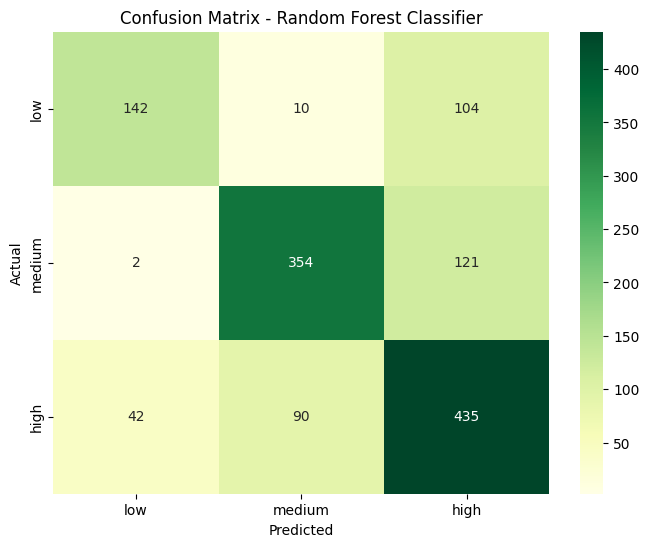


Sample prediction probabilities (first 5):
[[0.51148215 0.06995046 0.41856739]
 [0.34697882 0.21219453 0.44082664]
 [0.48634974 0.11323528 0.40041498]
 [0.05643686 0.59202162 0.35154152]
 [0.01035945 0.71900428 0.27063627]]

FEATURE IMPORTANCE

Feature Importance Ranking:
             Feature  Importance
             alcohol    0.151296
             density    0.108708
    volatile acidity    0.108109
total sulfur dioxide    0.083752
           chlorides    0.083687
      residual sugar    0.082177
 free sulfur dioxide    0.081958
           sulphates    0.080345
         citric acid    0.075164
                  pH    0.074661
       fixed acidity    0.067154
           wine_type    0.002989


C:\Users\anish\AppData\Local\Temp\ipykernel_9208\2551609496.py:90: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_rf, palette='viridis')


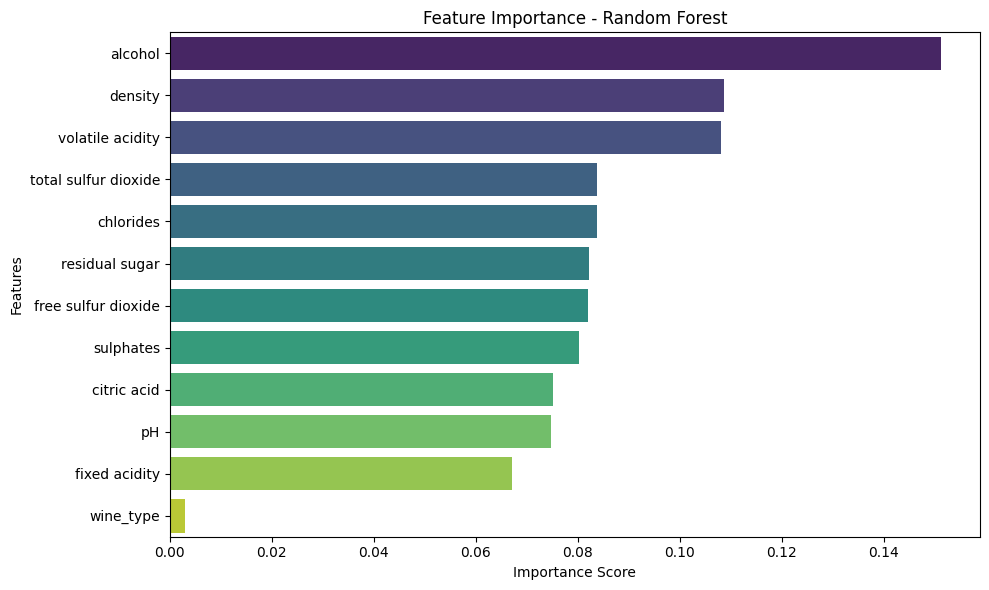


CROSS-VALIDATION (5-Fold)

CV Scores: [0.68557692 0.67692308 0.68431184 0.69971126 0.6852743 ]
Mean CV Accuracy: 0.6864 (+/- 0.0148)

EFFECT OF NUMBER OF TREES (n_estimators)


C:\Users\anish\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\ensemble\_forest.py:615: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


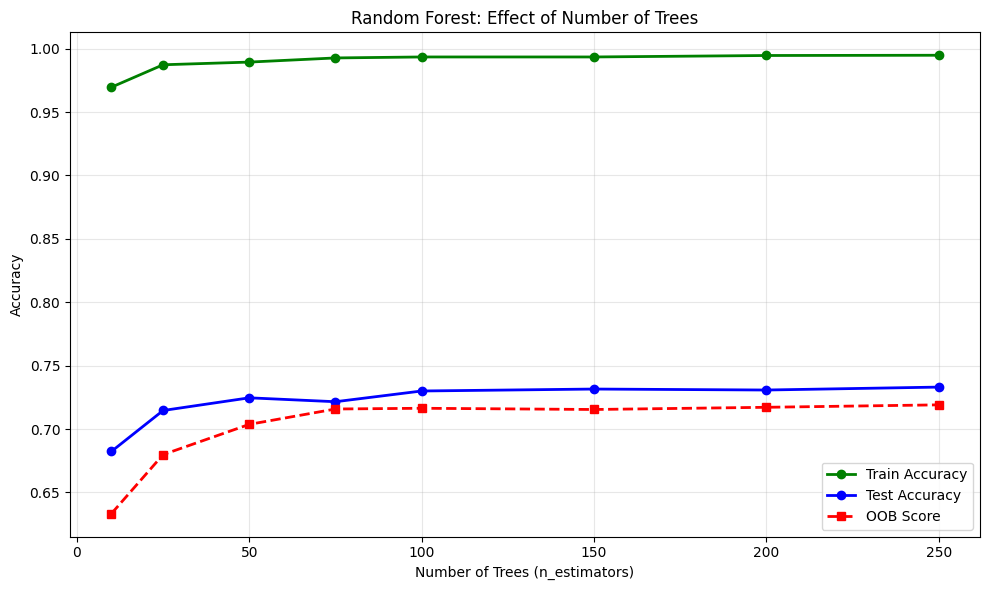


Optimal number of trees: 250
Best test accuracy: 0.7331

EFFECT OF MAX DEPTH


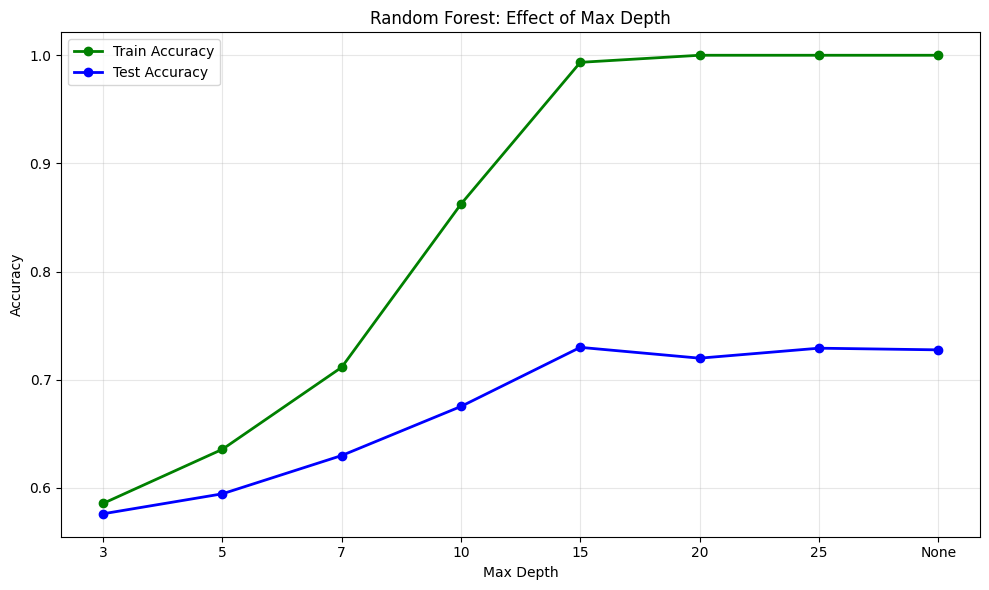


Optimal max_depth: 15
Best test accuracy: 0.7300

RANDOM FOREST MODEL SUMMARY

Final Model Parameters:
  • n_estimators: 100
  • max_depth: 15
  • min_samples_split: 5
  • min_samples_leaf: 2
  • max_features: sqrt

Performance:
  • Test Accuracy: 0.7162
  • OOB Score: 0.7069
  • CV Mean Accuracy: 0.6864

Top 3 Important Features:
  • alcohol: 0.1513
  • density: 0.1087
  • volatile acidity: 0.1081


In [21]:
# Import Random Forest Classifier and evaluation metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# ============================================================
# RANDOM FOREST CLASSIFIER
# ============================================================
print("="*60)
print("RANDOM FOREST ENSEMBLE CLASSIFICATION RESULTS")
print("="*60)

# Create and train Random Forest Classifier
rf_classifier = RandomForestClassifier(
    n_estimators=100,       # Number of trees in the forest
    criterion='gini',       # Split criterion: 'gini' or 'entropy'
    max_depth=15,           # Maximum depth of each tree
    min_samples_split=5,    # Minimum samples to split a node
    min_samples_leaf=2,     # Minimum samples at a leaf node
    max_features='sqrt',    # Number of features for best split ('sqrt', 'log2', or int)
    bootstrap=True,         # Whether to use bootstrap samples
    oob_score=True,         # Use out-of-bag samples for accuracy estimation
    n_jobs=-1,              # Use all CPU cores
    random_state=42
)

# Fit the model on training data (Random Forest doesn't require scaling)
rf_classifier.fit(X_train_scaled, y_train)

# Make predictions on test data
y_pred_rf = rf_classifier.predict(X_test_scaled)

# Evaluate the model
print(f"\nNumber of Trees: {rf_classifier.n_estimators}")
print(f"Max Depth: {rf_classifier.max_depth}")

# Accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"\nTest Accuracy: {accuracy_rf:.4f} ({accuracy_rf*100:.2f}%)")

# Out-of-Bag Score (built-in cross-validation estimate)
print(f"OOB Score: {rf_classifier.oob_score_:.4f} ({rf_classifier.oob_score_*100:.2f}%)")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))

# Confusion Matrix
print("Confusion Matrix:")
cm_rf = confusion_matrix(y_test, y_pred_rf)
print(cm_rf)

# Visualize Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='YlGn', 
            xticklabels=['low', 'medium', 'high'],
            yticklabels=['low', 'medium', 'high'])
plt.title('Confusion Matrix - Random Forest Classifier')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Get prediction probabilities
y_pred_proba_rf = rf_classifier.predict_proba(X_test_scaled)
print("\nSample prediction probabilities (first 5):")
print(y_pred_proba_rf[:5])


# ============================================================
# FEATURE IMPORTANCE
# ============================================================
print("\n" + "="*60)
print("FEATURE IMPORTANCE")
print("="*60)

# Get feature importances
feature_importance_rf = pd.DataFrame({
    'Feature': X.columns.tolist(),
    'Importance': rf_classifier.feature_importances_
}).sort_values('Importance', ascending=False)

print("\nFeature Importance Ranking:")
print(feature_importance_rf.to_string(index=False))

# Visualize Feature Importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_rf, palette='viridis')
plt.title('Feature Importance - Random Forest')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.tight_layout()
plt.show()


# ============================================================
# CROSS-VALIDATION
# ============================================================
print("\n" + "="*60)
print("CROSS-VALIDATION (5-Fold)")
print("="*60)

cv_scores = cross_val_score(rf_classifier, X_train_scaled, y_train, cv=5, scoring='accuracy')
print(f"\nCV Scores: {cv_scores}")
print(f"Mean CV Accuracy: {cv_scores.mean():.4f} (+/- {cv_scores.std()*2:.4f})")


# ============================================================
# EFFECT OF NUMBER OF TREES
# ============================================================
print("\n" + "="*60)
print("EFFECT OF NUMBER OF TREES (n_estimators)")
print("="*60)

n_trees_range = [10, 25, 50, 75, 100, 150, 200, 250]
train_scores_rf = []
test_scores_rf = []
oob_scores_rf = []

for n_trees in n_trees_range:
    rf_temp = RandomForestClassifier(
        n_estimators=n_trees,
        max_depth=15,
        oob_score=True,
        n_jobs=-1,
        random_state=42
    )
    rf_temp.fit(X_train_scaled, y_train)
    train_scores_rf.append(rf_temp.score(X_train_scaled, y_train))
    test_scores_rf.append(rf_temp.score(X_test_scaled, y_test))
    oob_scores_rf.append(rf_temp.oob_score_)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(n_trees_range, train_scores_rf, 'g-o', label='Train Accuracy', linewidth=2)
plt.plot(n_trees_range, test_scores_rf, 'b-o', label='Test Accuracy', linewidth=2)
plt.plot(n_trees_range, oob_scores_rf, 'r--s', label='OOB Score', linewidth=2)
plt.xlabel('Number of Trees (n_estimators)')
plt.ylabel('Accuracy')
plt.title('Random Forest: Effect of Number of Trees')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Find optimal number of trees
optimal_trees = n_trees_range[np.argmax(test_scores_rf)]
print(f"\nOptimal number of trees: {optimal_trees}")
print(f"Best test accuracy: {max(test_scores_rf):.4f}")


# ============================================================
# EFFECT OF MAX DEPTH
# ============================================================
print("\n" + "="*60)
print("EFFECT OF MAX DEPTH")
print("="*60)

max_depth_range = [3, 5, 7, 10, 15, 20, 25, None]
depth_labels = [str(d) if d else 'None' for d in max_depth_range]
train_scores_depth = []
test_scores_depth = []

for depth in max_depth_range:
    rf_temp = RandomForestClassifier(
        n_estimators=100,
        max_depth=depth,
        n_jobs=-1,
        random_state=42
    )
    rf_temp.fit(X_train_scaled, y_train)
    train_scores_depth.append(rf_temp.score(X_train_scaled, y_train))
    test_scores_depth.append(rf_temp.score(X_test_scaled, y_test))

# Plot
plt.figure(figsize=(10, 6))
x_pos = range(len(max_depth_range))
plt.plot(x_pos, train_scores_depth, 'g-o', label='Train Accuracy', linewidth=2)
plt.plot(x_pos, test_scores_depth, 'b-o', label='Test Accuracy', linewidth=2)
plt.xticks(x_pos, depth_labels)
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Random Forest: Effect of Max Depth')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Find optimal depth
optimal_depth_idx = np.argmax(test_scores_depth)
optimal_depth = max_depth_range[optimal_depth_idx]
print(f"\nOptimal max_depth: {optimal_depth}")
print(f"Best test accuracy: {max(test_scores_depth):.4f}")


# ============================================================
# MODEL SUMMARY
# ============================================================
print("\n" + "="*60)
print("RANDOM FOREST MODEL SUMMARY")
print("="*60)
print(f"\nFinal Model Parameters:")
print(f"  • n_estimators: {rf_classifier.n_estimators}")
print(f"  • max_depth: {rf_classifier.max_depth}")
print(f"  • min_samples_split: {rf_classifier.min_samples_split}")
print(f"  • min_samples_leaf: {rf_classifier.min_samples_leaf}")
print(f"  • max_features: {rf_classifier.max_features}")
print(f"\nPerformance:")
print(f"  • Test Accuracy: {accuracy_rf:.4f}")
print(f"  • OOB Score: {rf_classifier.oob_score_:.4f}")
print(f"  • CV Mean Accuracy: {cv_scores.mean():.4f}")
print(f"\nTop 3 Important Features:")
for i, row in feature_importance_rf.head(3).iterrows():
    print(f"  • {row['Feature']}: {row['Importance']:.4f}")

XGBOOST ENSEMBLE CLASSIFICATION RESULTS

Class mapping: {'high': 0, 'low': 1, 'medium': 2}


C:\Users\anish\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\xgboost\training.py:199: UserWarning: [09:53:12] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



Number of Boosting Rounds: 100
Max Depth: 6
Learning Rate: 0.1

Test Accuracy: 0.6900 (69.00%)

Classification Report:
              precision    recall  f1-score   support

        high       0.71      0.53      0.60       256
         low       0.77      0.72      0.75       477
      medium       0.63      0.74      0.68       567

    accuracy                           0.69      1300
   macro avg       0.70      0.66      0.68      1300
weighted avg       0.70      0.69      0.69      1300

Confusion Matrix:
[[135   6 115]
 [  4 345 128]
 [ 52  98 417]]


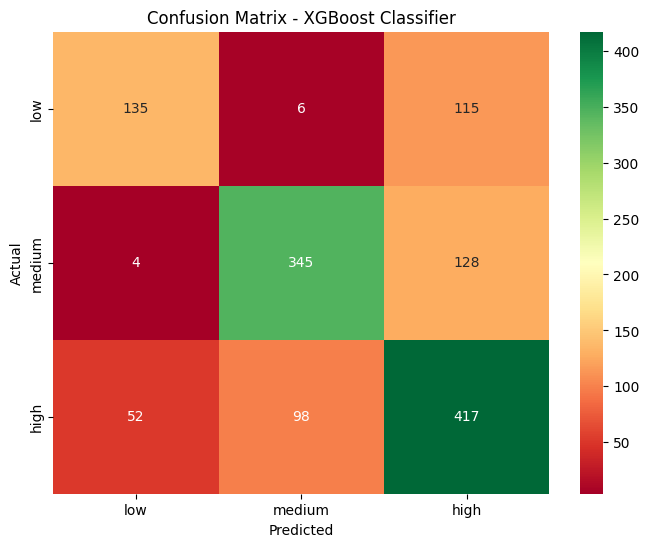


Sample prediction probabilities (first 5):
[[0.5441548  0.05471363 0.40113154]
 [0.38290402 0.14220427 0.47489166]
 [0.67764485 0.05293479 0.26942042]
 [0.05558405 0.38311654 0.56129944]
 [0.0104574  0.65806985 0.33147278]]

FEATURE IMPORTANCE

Feature Importance Ranking:
             Feature  Importance
             alcohol    0.186782
           wine_type    0.132922
    volatile acidity    0.094909
             density    0.076623
      residual sugar    0.068437
 free sulfur dioxide    0.068168
           sulphates    0.067377
total sulfur dioxide    0.064358
         citric acid    0.063392
           chlorides    0.063153
                  pH    0.057093
       fixed acidity    0.056785


C:\Users\anish\AppData\Local\Temp\ipykernel_9208\46439265.py:101: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_xgb, palette='rocket')


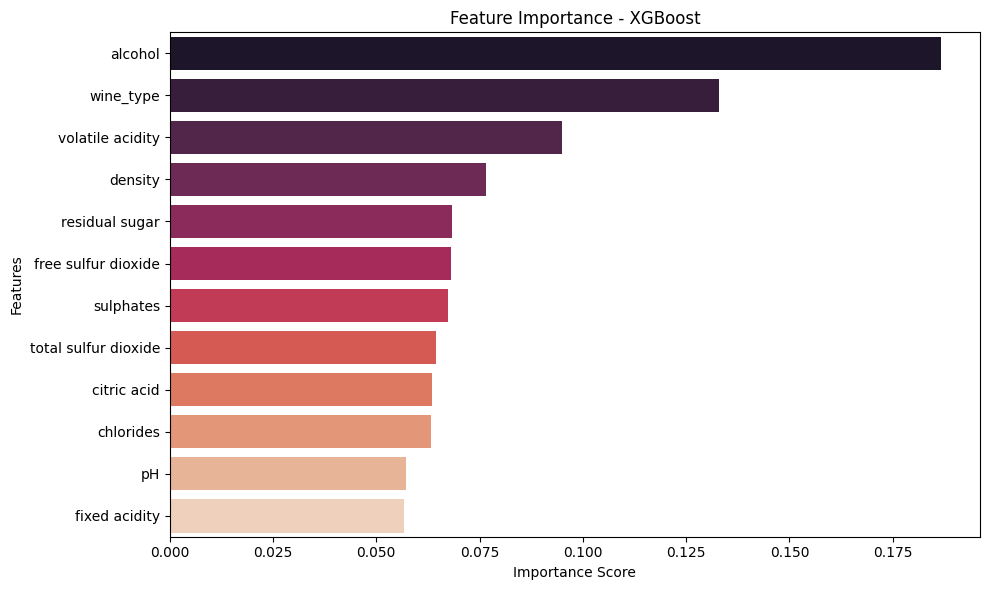

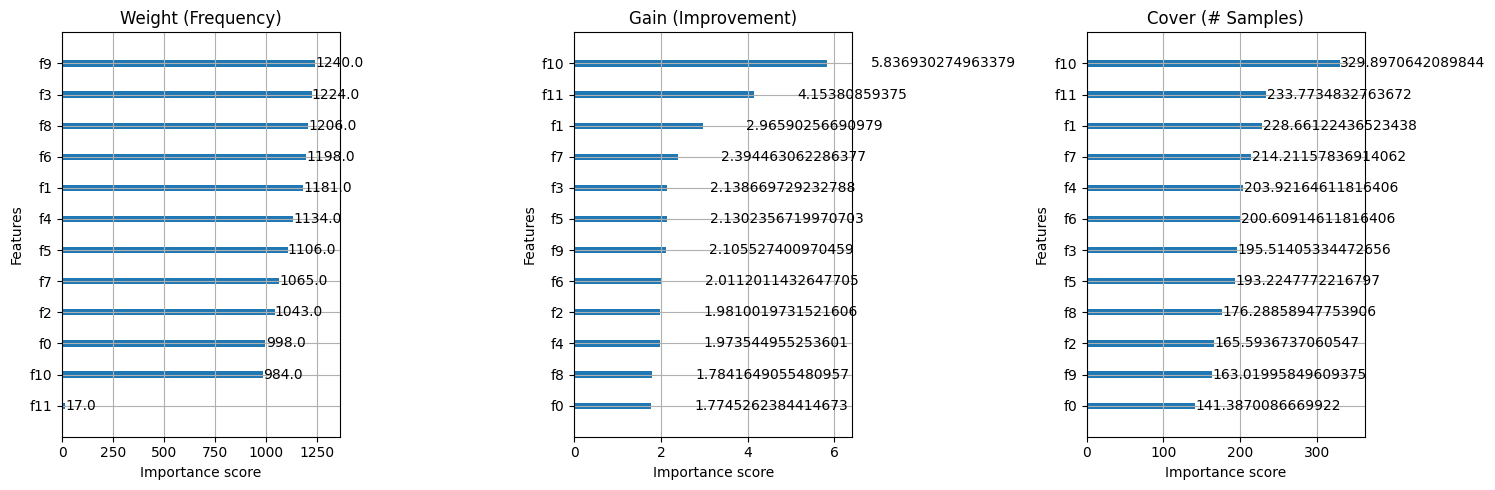


CROSS-VALIDATION (5-Fold)


C:\Users\anish\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\xgboost\training.py:199: UserWarning: [09:53:17] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\anish\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\xgboost\training.py:199: UserWarning: [09:53:24] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\anish\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\xgboost\training.py:199: UserWarning: [09:53:25] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } 


CV Scores: [0.67692308 0.66730769 0.65543792 0.69008662 0.68816169]
Mean CV Accuracy: 0.6756 (+/- 0.0260)

EFFECT OF LEARNING RATE


C:\Users\anish\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\xgboost\training.py:199: UserWarning: [09:53:25] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\anish\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\xgboost\training.py:199: UserWarning: [09:53:26] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\anish\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\xgboost\training.py:199: UserWarning: [09:53:26] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } 

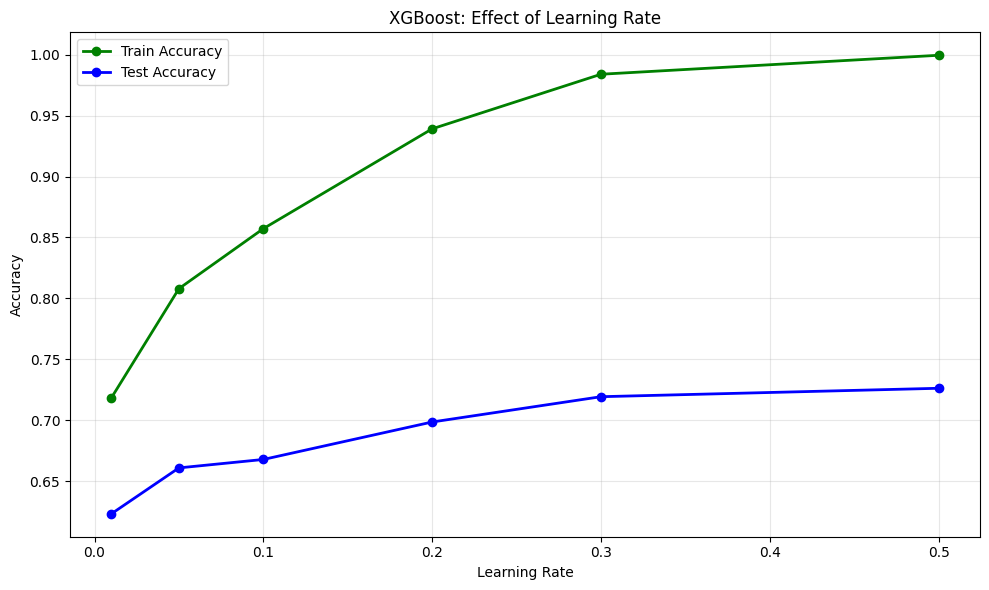


Optimal learning rate: 0.5
Best test accuracy: 0.7262

EFFECT OF NUMBER OF BOOSTING ROUNDS (n_estimators)


C:\Users\anish\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\xgboost\training.py:199: UserWarning: [09:53:27] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\anish\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\xgboost\training.py:199: UserWarning: [09:53:28] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\anish\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\xgboost\training.py:199: UserWarning: [09:53:28] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } 

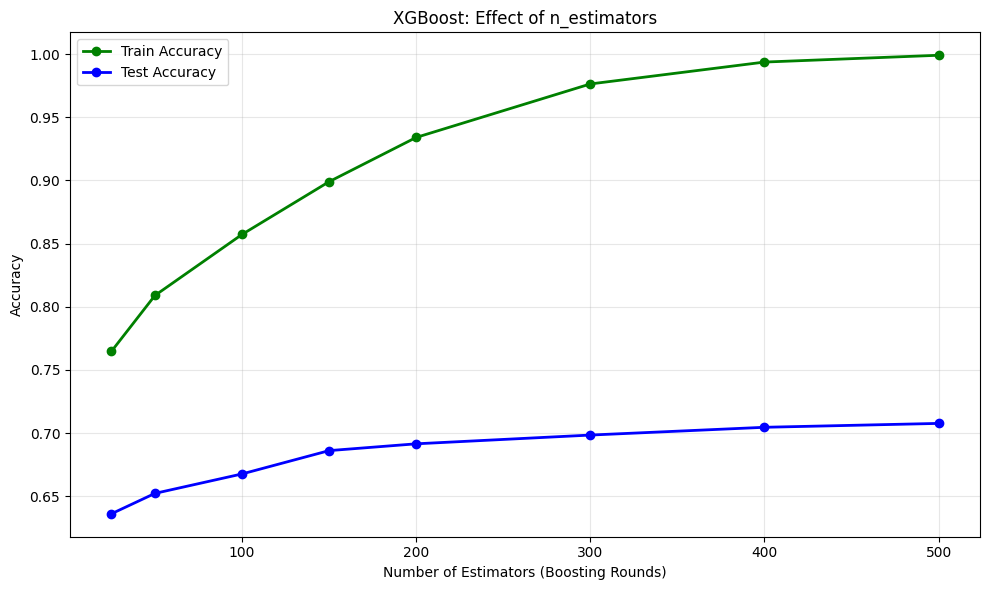


Optimal n_estimators: 500
Best test accuracy: 0.7077

EFFECT OF MAX DEPTH


C:\Users\anish\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\xgboost\training.py:199: UserWarning: [09:53:33] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\anish\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\xgboost\training.py:199: UserWarning: [09:53:34] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\anish\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\xgboost\training.py:199: UserWarning: [09:53:34] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } 

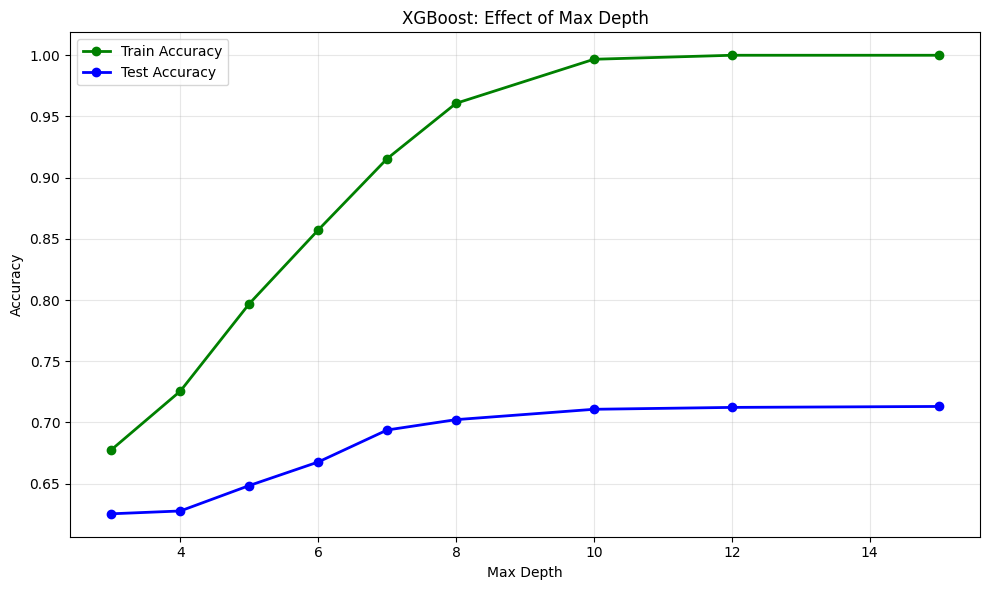


Optimal max_depth: 15
Best test accuracy: 0.7131

XGBOOST MODEL SUMMARY

Final Model Parameters:
  • n_estimators: 100
  • max_depth: 6
  • learning_rate: 0.1
  • subsample: 0.8
  • colsample_bytree: 0.8
  • reg_lambda (L2): 1
  • reg_alpha (L1): 0

Performance:
  • Test Accuracy: 0.6900
  • CV Mean Accuracy: 0.6756

Top 3 Important Features:
  • alcohol: 0.1868
  • wine_type: 0.1329
  • volatile acidity: 0.0949


In [23]:
# Import XGBoost Classifier and evaluation metrics
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# ============================================================
# XGBOOST CLASSIFIER
# ============================================================
print("="*60)
print("XGBOOST ENSEMBLE CLASSIFICATION RESULTS")
print("="*60)

# Encode target labels to numeric (XGBoost requires numeric labels)
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

print(f"\nClass mapping: {dict(zip(label_encoder.classes_, range(len(label_encoder.classes_))))}")

# Create and train XGBoost Classifier
xgb_classifier = XGBClassifier(
    n_estimators=100,          # Number of boosting rounds
    max_depth=6,               # Maximum tree depth
    learning_rate=0.1,         # Step size shrinkage (eta)
    min_child_weight=1,        # Minimum sum of instance weight in a child
    subsample=0.8,             # Subsample ratio of training instances
    colsample_bytree=0.8,      # Subsample ratio of columns for each tree
    gamma=0,                   # Minimum loss reduction for split
    reg_alpha=0,               # L1 regularization (Lasso)
    reg_lambda=1,              # L2 regularization (Ridge)
    objective='multi:softprob', # Multi-class classification
    eval_metric='mlogloss',    # Evaluation metric
    use_label_encoder=False,   # Disable deprecated label encoder
    random_state=42,
    n_jobs=-1                  # Use all CPU cores
)

# Fit the model
xgb_classifier.fit(X_train_scaled, y_train_encoded)

# Make predictions
y_pred_xgb = xgb_classifier.predict(X_test_scaled)
y_pred_xgb_labels = label_encoder.inverse_transform(y_pred_xgb)

# Evaluate the model
print(f"\nNumber of Boosting Rounds: {xgb_classifier.n_estimators}")
print(f"Max Depth: {xgb_classifier.max_depth}")
print(f"Learning Rate: {xgb_classifier.learning_rate}")

# Accuracy
accuracy_xgb = accuracy_score(y_test_encoded, y_pred_xgb)
print(f"\nTest Accuracy: {accuracy_xgb:.4f} ({accuracy_xgb*100:.2f}%)")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_xgb_labels))

# Confusion Matrix
print("Confusion Matrix:")
cm_xgb = confusion_matrix(y_test, y_pred_xgb_labels)
print(cm_xgb)

# Visualize Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='RdYlGn', 
            xticklabels=['low', 'medium', 'high'],
            yticklabels=['low', 'medium', 'high'])
plt.title('Confusion Matrix - XGBoost Classifier')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Get prediction probabilities
y_pred_proba_xgb = xgb_classifier.predict_proba(X_test_scaled)
print("\nSample prediction probabilities (first 5):")
print(y_pred_proba_xgb[:5])


# ============================================================
# FEATURE IMPORTANCE
# ============================================================
print("\n" + "="*60)
print("FEATURE IMPORTANCE")
print("="*60)

# Get feature importances
feature_importance_xgb = pd.DataFrame({
    'Feature': X.columns.tolist(),
    'Importance': xgb_classifier.feature_importances_
}).sort_values('Importance', ascending=False)

print("\nFeature Importance Ranking:")
print(feature_importance_xgb.to_string(index=False))

# Visualize Feature Importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_xgb, palette='rocket')
plt.title('Feature Importance - XGBoost')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.tight_layout()
plt.show()

# XGBoost built-in plot (different importance types)
from xgboost import plot_importance

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Weight: Number of times feature appears in trees
plot_importance(xgb_classifier, importance_type='weight', ax=axes[0], title='Weight (Frequency)')

# Gain: Average gain when feature is used
plot_importance(xgb_classifier, importance_type='gain', ax=axes[1], title='Gain (Improvement)')

# Cover: Average coverage when feature is used
plot_importance(xgb_classifier, importance_type='cover', ax=axes[2], title='Cover (# Samples)')

plt.tight_layout()
plt.show()


# ============================================================
# CROSS-VALIDATION
# ============================================================
print("\n" + "="*60)
print("CROSS-VALIDATION (5-Fold)")
print("="*60)

cv_scores_xgb = cross_val_score(xgb_classifier, X_train_scaled, y_train_encoded, cv=5, scoring='accuracy')
print(f"\nCV Scores: {cv_scores_xgb}")
print(f"Mean CV Accuracy: {cv_scores_xgb.mean():.4f} (+/- {cv_scores_xgb.std()*2:.4f})")


# ============================================================
# EFFECT OF LEARNING RATE
# ============================================================
print("\n" + "="*60)
print("EFFECT OF LEARNING RATE")
print("="*60)

learning_rates = [0.01, 0.05, 0.1, 0.2, 0.3, 0.5]
train_scores_lr = []
test_scores_lr = []

for lr in learning_rates:
    xgb_temp = XGBClassifier(
        n_estimators=100,
        max_depth=6,
        learning_rate=lr,
        use_label_encoder=False,
        eval_metric='mlogloss',
        random_state=42,
        n_jobs=-1
    )
    xgb_temp.fit(X_train_scaled, y_train_encoded)
    train_scores_lr.append(xgb_temp.score(X_train_scaled, y_train_encoded))
    test_scores_lr.append(xgb_temp.score(X_test_scaled, y_test_encoded))

# Plot
plt.figure(figsize=(10, 6))
plt.plot(learning_rates, train_scores_lr, 'g-o', label='Train Accuracy', linewidth=2)
plt.plot(learning_rates, test_scores_lr, 'b-o', label='Test Accuracy', linewidth=2)
plt.xlabel('Learning Rate')
plt.ylabel('Accuracy')
plt.title('XGBoost: Effect of Learning Rate')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

optimal_lr = learning_rates[np.argmax(test_scores_lr)]
print(f"\nOptimal learning rate: {optimal_lr}")
print(f"Best test accuracy: {max(test_scores_lr):.4f}")


# ============================================================
# EFFECT OF N_ESTIMATORS
# ============================================================
print("\n" + "="*60)
print("EFFECT OF NUMBER OF BOOSTING ROUNDS (n_estimators)")
print("="*60)

n_estimators_range = [25, 50, 100, 150, 200, 300, 400, 500]
train_scores_est = []
test_scores_est = []

for n_est in n_estimators_range:
    xgb_temp = XGBClassifier(
        n_estimators=n_est,
        max_depth=6,
        learning_rate=0.1,
        use_label_encoder=False,
        eval_metric='mlogloss',
        random_state=42,
        n_jobs=-1
    )
    xgb_temp.fit(X_train_scaled, y_train_encoded)
    train_scores_est.append(xgb_temp.score(X_train_scaled, y_train_encoded))
    test_scores_est.append(xgb_temp.score(X_test_scaled, y_test_encoded))

# Plot
plt.figure(figsize=(10, 6))
plt.plot(n_estimators_range, train_scores_est, 'g-o', label='Train Accuracy', linewidth=2)
plt.plot(n_estimators_range, test_scores_est, 'b-o', label='Test Accuracy', linewidth=2)
plt.xlabel('Number of Estimators (Boosting Rounds)')
plt.ylabel('Accuracy')
plt.title('XGBoost: Effect of n_estimators')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

optimal_est = n_estimators_range[np.argmax(test_scores_est)]
print(f"\nOptimal n_estimators: {optimal_est}")
print(f"Best test accuracy: {max(test_scores_est):.4f}")


# ============================================================
# EFFECT OF MAX DEPTH
# ============================================================
print("\n" + "="*60)
print("EFFECT OF MAX DEPTH")
print("="*60)

max_depth_range = [3, 4, 5, 6, 7, 8, 10, 12, 15]
train_scores_depth = []
test_scores_depth = []

for depth in max_depth_range:
    xgb_temp = XGBClassifier(
        n_estimators=100,
        max_depth=depth,
        learning_rate=0.1,
        use_label_encoder=False,
        eval_metric='mlogloss',
        random_state=42,
        n_jobs=-1
    )
    xgb_temp.fit(X_train_scaled, y_train_encoded)
    train_scores_depth.append(xgb_temp.score(X_train_scaled, y_train_encoded))
    test_scores_depth.append(xgb_temp.score(X_test_scaled, y_test_encoded))

# Plot
plt.figure(figsize=(10, 6))
plt.plot(max_depth_range, train_scores_depth, 'g-o', label='Train Accuracy', linewidth=2)
plt.plot(max_depth_range, test_scores_depth, 'b-o', label='Test Accuracy', linewidth=2)
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('XGBoost: Effect of Max Depth')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

optimal_depth = max_depth_range[np.argmax(test_scores_depth)]
print(f"\nOptimal max_depth: {optimal_depth}")
print(f"Best test accuracy: {max(test_scores_depth):.4f}")


# ============================================================
# MODEL SUMMARY
# ============================================================
print("\n" + "="*60)
print("XGBOOST MODEL SUMMARY")
print("="*60)
print(f"\nFinal Model Parameters:")
print(f"  • n_estimators: {xgb_classifier.n_estimators}")
print(f"  • max_depth: {xgb_classifier.max_depth}")
print(f"  • learning_rate: {xgb_classifier.learning_rate}")
print(f"  • subsample: {xgb_classifier.subsample}")
print(f"  • colsample_bytree: {xgb_classifier.colsample_bytree}")
print(f"  • reg_lambda (L2): {xgb_classifier.reg_lambda}")
print(f"  • reg_alpha (L1): {xgb_classifier.reg_alpha}")
print(f"\nPerformance:")
print(f"  • Test Accuracy: {accuracy_xgb:.4f}")
print(f"  • CV Mean Accuracy: {cv_scores_xgb.mean():.4f}")
print(f"\nTop 3 Important Features:")
for i, row in feature_importance_xgb.head(3).iterrows():
    print(f"  • {row['Feature']}: {row['Importance']:.4f}")